# 插值
通过实验观察得到某个未知函数$y=f(x)$的一系列数据点 $(x_i,y_i)(i=0,1,···,n)$，一般要求 $x_0<x_1<···<x_n$，但对于$x$的其他对应的函数值使未知的。因此希望能通过这些数据点得到函数的解析表达式，插值法是寻找函数近似表达式的有效方法之一。

## 插值方法
### <span style="color: orange">1. Lagrange 插值</span>

$P(x)=\sum_{i=0}^{n}l_i(x)y_i$

其中，$l_i(x)=\prod_{j=0,j\not=i}^n \frac{x-x_j}{x_i-x_j}$，则称其为Lagrange插值多项式

编写函数Lag_intp(x,y,x0)，实现Lagrange插值，其中$x$和$y$是两个具有相同长度的Numpy数组

In [1]:
def h(x,y,a):
    s = 0.0
    for i in range(len(y)):
        t = y[i]
        for j in range(len(y)):
            if i != j:
                t*=(a-x[j])/(x[i]-x[j])
        s+=t
    return s

### <span style="color: orange">2. 分段线性插值</span>
分段一次多项式插值，几何上就是用折线代替曲线$y=f(x)$，也称折线插值或分段线性插值，分段线性插值多项式$P_1(x)$为:

$P_1(x)=\frac{x-x_i}{x_{i+1}-x_i}y_{i+1}+\frac{x-x_{i+1}}{x_i-x_{i+1}}y_i$，  $x\in[x_i,x_{i+1}],i=0,1,···,n-1$

### <span style="color: orange">3. 分段二次插值</span>
插值函数$P_2(x)$是一个二次多项式，几何上就是用分段抛物线代替曲线$y=f(x)$，此时要求有$2n+1$个节点

### <span style="color: orange">4. 牛顿插值</span>

1. 计算$\Delta^kf(x)$函数的差分

In [2]:
def diff_forward(f,k,h,x):
    if k<=0:
        return f(x)
    else:
        return diff_forward(f,k-1,h,x+h) - diff_forward(f,k-1,h,x)

2. 函数的差商

一阶差商：$f[x_i,x_j]=\frac{f(x_i)-f(x_j)}{x_i-x_j}$;以此类推。

计算n阶差商$f[x_0,x_1,x_2,···,x_n]$

In [3]:
"""
输入参数:xi为所有插值节点的数组
输入参数:fi为所有插值节点函数值的数组
返回值:返回xi的i阶差商(i为xi长度减1)
"""
def diff_quo(xi=[], fi=[]):
    if len(xi) > 2 and len(fi) > 2:
        return (diff_quo(xi[:len(xi)-1], fi[:len(fi)-1])-diff_quo(xi[1:len(xi)], fi[1:len(fi)]))/float(xi[0]-xi[-1])
    return (fi[0]-fi[1])/float(xi[0]-xi[1])

3. 牛顿插值公式

$N_1(x)=f(x_0)+\frac{f(x_1)-f(x_0)}{x_1-x_0}(x-x_0)$,可将其表示成:$N_1(x)=f(x_0)+(x-x_0)f[x0,x1]$，称为一次牛顿插值多项式，以此类推。

# 用Python求解插值问题
scipy.interpolate 模块有一维插值函数interp1d、二维插值函数interp2d、多维插值函数interpn、interpnd.

## 1.一维插值

```python
    from scipy.interpolate import interp1d

    f1 = interp1d(
        x,               # 已知点的x坐标（1D数组）
        y,               # 已知点的y坐标（1D数组或2D数组，多列时每列独立插值）
        kind='linear',   # 插值类型（见下文）
        axis=-1,         # 沿哪个轴插值（默认最后一维）
        copy=True,
        bounds_error=None,  # 是否允许外推（默认None，自动选择）
        fill_value=nan,     # 外推时的填充值
        assume_sorted=False # 是否假设x已排序
    )
```
> 插值方法（kind 参数）

|方法|	描述	|连续性	|适用场景|
| :----: | :----: | :----: | :----: |
|'linear'|	线性插值（默认）|	C0	|快速简单插值|
|'nearest'	|最近邻插值	|不连续	|离散数据|
|'zero'|	零阶样条（阶梯函数）|	不连续|	分段常量数据|
|'slinear'	|一次样条插值|	C1	|平滑性要求较低|
|'quadratic'|	二次样条插值|	C2|	中等平滑性|
|'cubic'|	三次样条插值|	C2|	高平滑性（推荐）|
|'previous'/'next'	|前一个/后一个值|	不连续|	时间序列填充|

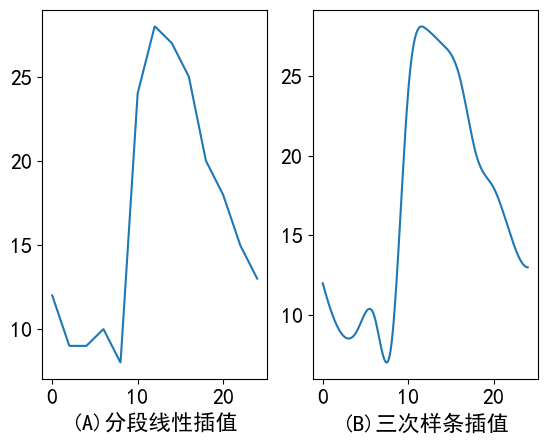

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.arange(0,25,2)
y = np.array([12,9,9,10,8,24,28,27,25,20,18,15,13])
xnew = np.linspace(0,24,500)  #插值点  np.linspace(0, 24, 500) 是 NumPy 中用于生成等差数列的函数，它会生成一个包含 500 个均匀间隔数值的数组，范围从 0 到 24。
f1 = interp1d(x,y); y1 = f1(xnew)
f2 = interp1d(x,y,'cubic'); y2 = f2(xnew)
plt.rc('font',size=16); plt.rc('font',family='SimHei')
plt.subplot(121), plt.plot(xnew, y1)
plt.xlabel('(A)分段线性插值')
plt.subplot(122), plt.plot(xnew, y2)
plt.xlabel('(B)三次样条插值')
plt.show()

## 2.二维网格节点插值

```python

```

区域面积为: 4782742.720125111


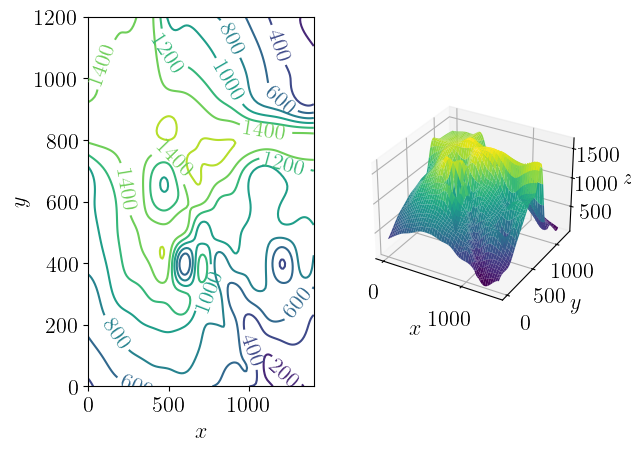

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.interpolate import RegularGridInterpolator

z = np.loadtxt('Pdata7_5.txt')
x = np.arange(0,1500,100)
y = np.arange(1200,-100,-100)

# X, Y = np.meshgrid(x, y, indexing='ij')  # 注意indexing='ij'
# 创建插值器
interp = RegularGridInterpolator((x, y), z.T, method='cubic')
xn = np.linspace(0,1400,141)
yn = np.linspace(0,1200,121)
X_new, Y_new = np.meshgrid(xn, yn, indexing='ij')
points = np.column_stack((X_new.ravel(), Y_new.ravel()))
m = len(xn); n = len(yn)
zn = interp(points).reshape(m, n)
s = 0
# print(zn.shape)
for i in np.arange(m-1):
    for j in np.arange(n-1):
        p1 = np.array([xn[i],yn[j],zn[i,j]])         #注意zn的indexing='ij'
        p2 = np.array([xn[i+1],yn[j],zn[i+1,j]])
        p3 = np.array([xn[i+1],yn[j+1],zn[i+1,j+1]])
        p4 = np.array([xn[i],yn[j+1],zn[i,j+1]])
        p12 = norm(p1-p2); p23 = norm(p3-p2); p13 = norm(p3-p1)
        p14 = norm(p4-p1); p34 = norm(p4-p3)
        L1 = (p12+p23+p13)/2; s1 = np.sqrt(L1*(L1-p12)*(L1-p23)*(L1-p13))
        L2 = (p13+p14+p34)/2; s2 = np.sqrt(L2*(L2-p13)*(L2-p14)*(L2-p34))
        s += s1+s2
print('区域面积为:', s)
plt.rc('font',size=16); plt.rc('text',usetex=True)
plt.subplot(121)
contr = plt.contour(X_new, Y_new,zn)  #plt.contour(X, Y, Z) 是 Matplotlib 中用于绘制 等高线图（Contour Plot） 的函数  X,Y是二维数组，表示网格点的 x 和 y 坐标（通常由 np.meshgrid() 生成）。
plt.clabel(contr)  #用于 在等高线上标注数值，让每条等高线显示其对应的 z 值。
plt.xlabel('$x$'); plt.ylabel('$y$',rotation=90)
ax = plt.subplot(122, projection='3d')  #projection='3d' 指定为 3D 坐标系。
X,Y = np.meshgrid(xn,yn)
ax.plot_surface(X_new, Y_new,zn,cmap='viridis')  #cmap='viridis' 指定颜色映射（从低到高渐变）。
ax.set_xlabel('$x$'); ax.set_ylabel('$y$'); ax.set_zlabel('$z$')
plt.show()

## 3.二维散乱点插值

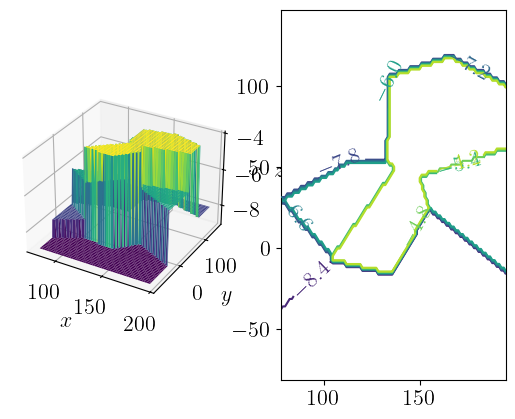

In [6]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

x = np.array([129,140,103.5,88,185.5,195,105,157.5,107.5,77,81,162,162,117.5])
y = np.array([7.5,141.5,23,147,22.5,137.5,85.5,-6.5,-81,3,56.5,-66.5,84,-33.5])
z = -np.array([4,8,6,8,6,8,8,9,9,8,8,9,4,9])
xn = np.linspace(x.min(), x.max(), 100)
yn = np.linspace(y.min(), y.max(), 100)
xng, yng = np.meshgrid(xn, yn)  #构造网格节点
zn = griddata((x,y),z,(xng,yng), method='nearest')  #最近临点插值
plt.rc('font',size=16); plt.rc('text',usetex=True)
ax = plt.subplot(121,projection='3d')
ax.plot_surface(xng,yng,zn,cmap='viridis')
ax.set_xlabel('$x$'); ax.set_ylabel('$y$'); ax.set_zlabel('$z$')
plt.subplot(122)
c = plt.contour(xn,yn,zn,8)
plt.clabel(c)
plt.show()